<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%B6%84%EB%A5%98%20%EB%B0%8F%20%EC%97%AC%EB%9F%AC%20%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%20%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST 데이터셋 내려받기

샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키

레이블 배열을 담은 target키

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

# 데이터 담기

784는 28x28 픽셀을 이미지가 갖고있기 때문이다.

이는 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타낸다.

In [6]:
x, y=mnist['data'],mnist['target']
print('데이터 개수, 픽셀확인 :', x.shape)
print('타겟 데이터 확인 :', y.shape)

데이터 개수, 픽셀확인 : (70000, 784)
타겟 데이터 확인 : (70000,)


# 샘플의 특성 벡터를 추출해서 28x28 배열로 크기를 바꾸고 matplotlib의 imshow() 함수를 사용해서 그리면 된다.

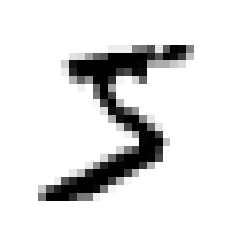

5


In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = x[0] # 첫번째 이미지 갖고오기

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary') # cmap을 binary로 설정해주면, 흰색 바탕에 검은 글씨로 나타난다.
plt.axis('off')
plt.show()

print(y[0]) # 정답확인

# Y값은 문자열로 되어있고, 대부분 머신러닝 알고리즘은 숫자를 이용하므로 y를 정수로 변환해야한다.

In [14]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [23]:
import numpy as np
y=y.astype(np.uint8) # astype(float)해도 된다.

# 훈련, 테스트 셋 나누기
어떤 학습 알고리즘은 훈련 샘플의 순서에 민감해서 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠진다.
그래서 데이터셋을 섞으면 이런 문제를 방지할 수 있다.

In [25]:
x_train,x_test,y_train,y_test = x[:60000], x[60000:], y[:60000], y[60000:]

# 이진 분류기 훈련
동전 뒤집기처럼 yes or no로 클래스를 구분할 수 있는 이진 분류기의 한 예이다.

In [27]:
y_train_5=(y_train == 5)

y_test_5 = (y_test == 5)

In [29]:
y_train_5

array([ True, False, False, ...,  True, False, False])

# Stochastic Gradient Descent(SGD) 확률적 경사 하강법

한 번에 하나씩 훈련 샘플을 독립적으로 처리한다.

SGDClassifier는 훈련하는 데 무작위성을 이용한다.(그래서 확률적이라 한다.)
결과를 재현하고 싶다면 random_state 매개변수를 지정해야한다.

사이킷런의 SDGClassifier와 SGDRegressor는 기본적으로 에포크마다 훈련데이터를 다시 섞는다.(iteration 마다)

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, verbose=1)
sgd_clf.fit(x_train, y_train_5)

-- Epoch 1
Norm: 8147.16, NNZs: 624, Bias: 12.352211, T: 60000, Avg. loss: 96002.101183
Total training time: 0.11 seconds.
-- Epoch 2
Norm: 4850.19, NNZs: 630, Bias: 21.765171, T: 120000, Avg. loss: 13448.913390
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 3609.24, NNZs: 639, Bias: 26.212700, T: 180000, Avg. loss: 7640.779336
Total training time: 0.32 seconds.
-- Epoch 4
Norm: 2958.05, NNZs: 642, Bias: 29.904666, T: 240000, Avg. loss: 5411.680114
Total training time: 0.42 seconds.
-- Epoch 5
Norm: 2535.62, NNZs: 643, Bias: 32.474667, T: 300000, Avg. loss: 4222.549757
Total training time: 0.53 seconds.
-- Epoch 6
Norm: 2202.83, NNZs: 646, Bias: 34.517745, T: 360000, Avg. loss: 3421.870201
Total training time: 0.63 seconds.
-- Epoch 7
Norm: 1972.29, NNZs: 647, Bias: 36.129522, T: 420000, Avg. loss: 2905.781392
Total training time: 0.74 seconds.
-- Epoch 8
Norm: 1801.26, NNZs: 649, Bias: 37.668583, T: 480000, Avg. loss: 2539.335154
Total training time: 0.85 seconds.
-- Epoch 9
Norm

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=1, warm_start=False)

# 이 모델을 사용해서 숫자 5의 이미지를 감지해본다.

In [35]:
sgd_clf.predict([some_digit])

array([ True])

#  여기서 잠깐, StratifiedShuffledSplit에 대한 설명.

원래의 데이터셋에서 각 클래스마다의 비율을 유지해 준채 훈련과 테스트 데이터셋을 분리해준다. 섞는 횟수는 자유임

근데 이게 StratifiedKfold랑 무슨 차이인지 아직은 잘 모르겠다.

그냥 섞느냐 안섞느냐의 차이인것 같기도 하다.

In [81]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
xx= np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
yy = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=6, test_size=0.5, random_state=0)
sss.get_n_splits(xx, yy) #몇번 섞었는지 알려준다.


6

In [83]:
for train_index, test_index in sss.split(xx, yy):
  print("TRAIN:", train_index, "TEST:", test_index)
  xx_train, xx_test = xx[train_index], xx[test_index]
  yy_train, yy_test = yy[train_index], yy[test_index]
print(xx_train) # 마지막에 섞인 폴드를 가지고 반환
print(xx_test)

TRAIN: [5 2 3] TEST: [4 1 0]
TRAIN: [5 1 4] TEST: [0 2 3]
TRAIN: [5 0 2] TEST: [4 3 1]
TRAIN: [4 1 0] TEST: [2 3 5]
TRAIN: [0 5 1] TEST: [3 4 2]
TRAIN: [2 3 4] TEST: [0 5 1]
[[1 2]
 [3 4]
 [1 2]]
[[1 2]
 [3 4]
 [3 4]]


# KFold 와 무슨 차이일까?

In [272]:
from sklearn.model_selection import StratifiedKFold
sk=StratifiedKFold(n_splits=3, random_state=0, shuffle=True) #n_splits는 fold의 수를 의미한다.

for train_index, test_index in sk.split(iing_x, iing_y):
  print("TRAIN:", train_index, "TEST:", test_index)
  xxx_train, xxx_test = iing['gender'].loc[train_index], iing['gender'].loc[test_index]
  yyy_train, yyx_test = iing['education'].loc[train_index], iing['education'].loc[test_index]


TRAIN: [    0     2     3 ... 45527 45528 45529] TEST: [    1     4     7 ... 45524 45530 45531]
TRAIN: [    1     4     6 ... 45527 45530 45531] TEST: [    0     2     3 ... 45526 45528 45529]
TRAIN: [    0     1     2 ... 45529 45530 45531] TEST: [    6    10    18 ... 45523 45525 45527]


In [260]:
 print(xxx_train.value_counts()/len(xxx_train))
print(yyy_train.value_counts()/len(yyy_train))

Male      0.535623
Female    0.464377
Name: gender, dtype: float64
2    0.369762
3    0.334402
4    0.172494
1    0.111746
0    0.011596
Name: education, dtype: float64


In [261]:
print(xxx_test.value_counts()/len(xxx_test))
print(yyx_test.value_counts()/len(yyx_test))

Male      0.528112
Female    0.471888
Name: gender, dtype: float64
2    0.369718
3    0.334446
4    0.172494
1    0.111746
0    0.011596
Name: education, dtype: float64


In [262]:
 print(iing['gender'].value_counts()/len(iing))
print(iing['education'].value_counts()/len(iing))

Male      0.531868
Female    0.468132
Name: gender, dtype: float64
2    0.369740
3    0.334424
4    0.172494
1    0.111746
0    0.011596
Name: education, dtype: float64


# n_splits=2로 하면 테스트와 트레인의 비율이 똑같다. 3으로하면 트레인데이터비율이 더 많아진다. 그러니까 숫자가 올라갈수록 테스트 사이즈는 줄어드는 것이다.

shuffle=True 로 설정해도, 인덱스는 순차적으로 쌓여간다.

In [273]:
xxx_train

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
45526    Female
45528      Male
45529    Female
45530      Male
45531      Male
Name: gender, Length: 30355, dtype: object

In [274]:
xxx_test

6          Male
10       Female
18       Female
24       Female
26       Female
          ...  
45520    Female
45521      Male
45523    Female
45525      Male
45527    Female
Name: gender, Length: 15177, dtype: object

In [265]:
print(len(iing))
print(len(xxx_train))
print(len(xxx_test))

45532
22766
22766


34149.0

In [232]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
for train_index, test_index in sss.split(iing_x, iing_y):
  print("TRAIN:", train_index, "TEST:", test_index)
  xx_train, xx_test = iing['gender'].loc[train_index], iing['gender'].loc[test_index]
  yy_train, yy_test = iing['education'].loc[train_index], iing['education'].loc[test_index]


TRAIN: [11823  5667 22716 ... 28114 37159 16283] TEST: [ 3086 34775 22286 ... 44304 44319 32695]
TRAIN: [17988  9181 30261 ... 21762 15791 16764] TEST: [17698 21679 35749 ... 43237 37294 43521]
TRAIN: [39522 35807 27692 ... 39666 20393 37420] TEST: [32529   175 15206 ... 34484 20452 25140]
TRAIN: [32546 37553 38658 ... 29222 10385 20976] TEST: [42613 30086  5728 ... 27639 20502 42703]
TRAIN: [20870 18470 23534 ... 33640 40534 23952] TEST: [24474 31293  3261 ... 27537 22272 26769]


In [233]:
print(xx_train.value_counts()/len(xx_train))
print(yy_train.value_counts()/len(yy_train))

Male      0.530434
Female    0.469566
Name: gender, dtype: float64
2    0.369729
3    0.334431
4    0.172503
1    0.111728
0    0.011609
Name: education, dtype: float64


In [234]:
print(xx_test.value_counts()/len(xx_test))
print(yy_test.value_counts()/len(yy_test))

Male      0.535212
Female    0.464788
Name: gender, dtype: float64
2    0.369766
3    0.334407
4    0.172474
1    0.111786
0    0.011567
Name: education, dtype: float64


In [235]:
print(iing['gender'].value_counts()/len(iing))
print(iing['education'].value_counts()/len(iing))

Male      0.531868
Female    0.468132
Name: gender, dtype: float64
2    0.369740
3    0.334424
4    0.172494
1    0.111746
0    0.011596
Name: education, dtype: float64


In [236]:
print(len(iing))
print(len(xx_train))
print(len(xx_test))

45532
31872
13660


In [237]:
xx_train

20870    Female
18470    Female
23534    Female
21359    Female
2089       Male
          ...  
16220    Female
11155      Male
33640    Female
40534    Female
23952      Male
Name: gender, Length: 31872, dtype: object

# 실험결과 정리

StratifiedShuffleSplit 특징 :

1. 데이터를 무작위로 섞는다.
2. 만약 어떤 변수가 타겟과 중요하게 연관되어 있다면(상관계수가 높다거나..) 그 변수를 기준으로 트레인 데이터와 테스트 데이터가
  원본데이터와 비슷한 비율(분포)을 유지하는것이 중요하다. 그리고 이것은 그 기능을 잘 수행해준다.
3. n_splits의 용도는 몇 번 섞을지 정한다. 많이 섞느냐 적게 섞느냐 중요한지 아직은 모르겠다. 순서가 중요한 데이터라면(시계열처럼) 안 섞는게 좋을것 같다.


StratifiedKFold 특징 :

1. 데이터를 섞지 않는다.
2. 이것도 똑같이 원본데이터셋의 비율을 유지해주는데 중요한것은 순서를 뒤짚지는 않는다.
3. n_splits의 용도는 StratifiedShuffleSplit과는 다르게, 몇 번 섞을지 정하는게 아니라, 훈련 데이터와 테스트 데이터의 비율을 조정해준다.
  예를 들어서 n_splits=2 라면, 1:1의 비율로 자르는 것이다.
  만약에 n_splits=3 이라면, 1:2의 비율로 자르는 것이다.(훈련데이터가 2/3, 테스트 데이터가 1/3)
  결론적으로는 이 파라미터가 늘어날수록 테스트데이터는 줄어든다는 것이다.
4.shuffle 파라미터는 데이터순서를 뒤섞는게아니라, 훈련 데이터와 테스트 데이터를 교차로 번갈아가며 데이터를 분할해 주는듯 하다.
  이것을 False로 지정하면, 훈련 데이터를 인덱스 순으로 먼저 비율을 맞추어주고, 나머지 테스트 데이터 비율을 맞춘다.
  그래서 트레인 데이터는 인덱스(순서)가 0부터 증가한다. 혹은, 순서대로 차근차근 증가한다.
  그리고 비율이 맞춰진 이후에 남은 인덱스로 테스트데이터를 채우기 시작한다.

  이것을 True로 지정하면, 훈련데이터와 테스트데이터의 비율을 동시에 맞추기 시작한다.(그러면 인덱스가 교차로 부여된다.)
  그렇다고 훈련 데이터 및 테스트 데이터내의 순서가 섞이는 것은 아니다.